In [19]:
import xarray as xr
import numpy as np
import xgcm
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 16

from bbl_utils import *

import warnings
warnings.filterwarnings('ignore', '.*.')

div_cmap = plt.get_cmap('RdBu_r')
div_cmap.set_bad(color=(0.8,0.8,0.8))

cmap = plt.get_cmap('viridis')
cmap.set_bad(color=(0.8,0.8,0.8))

### Physical parameters

In [2]:
Γ = 0.0008613659531090722
θ = 1.53e-3
f = 0.53e-4

### Load dataset

In [3]:
nIter = 3
step0 = 7200
nstep = step0*2

iters = range(step0,nIter*nstep+step0,nstep)
iters_mean = range(nstep, nIter*nstep, nstep)
print("Iters: ",list(iters))

Iters:  [7200, 21600, 36000]


In [4]:
data_dir = "../../MITgcm/experiments/rotated_BBTRE/run/"
ds_snap = open_mdsdataset(data_dir,iters=iters,ignore_unknown_vars=True,prefix=["snapshotDiag"])
ds = open_mdsdataset(data_dir,iters=iters_mean,ignore_unknown_vars=True,prefix=["standardDiag", "budgetDiag"])

### Pre-process dataset

In [5]:
ds, coords, grid = pre_process(ds)
ds, coords = add_cartesian_coordinates(ds, coords, θ)
ds = add_background_temp(ds, Γ)
ds, coords = add_hab_coordinates(ds, coords)

ds_snap, coords_snap, grid_snap = pre_process(ds_snap)
ds_snap, coords_snap = add_cartesian_coordinates(ds_snap, coords_snap, θ)
ds_snap = add_background_temp(ds_snap, Γ)
ds_snap, coords_snap = add_hab_coordinates(ds_snap, coords_snap)

### Calculate derived variables

In [6]:
ζ = (-grid_snap.diff(ds_snap.UVEL * coords_snap.dxC, 'Y', boundary='extend')
     +grid_snap.diff(ds_snap.VVEL * coords_snap.dyC, 'X', boundary='extend'))/coords_snap.rAz

### Plotting

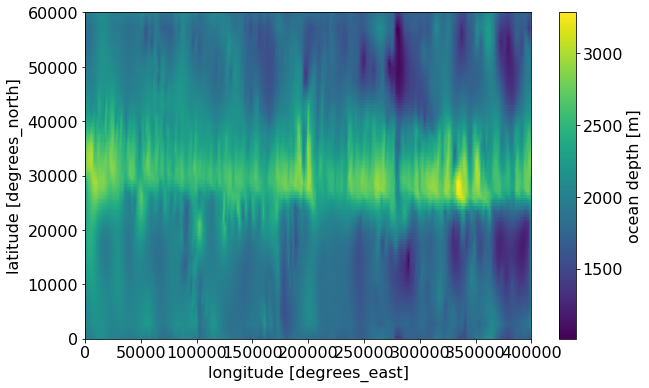

In [7]:
coords_snap['Depth'].plot()

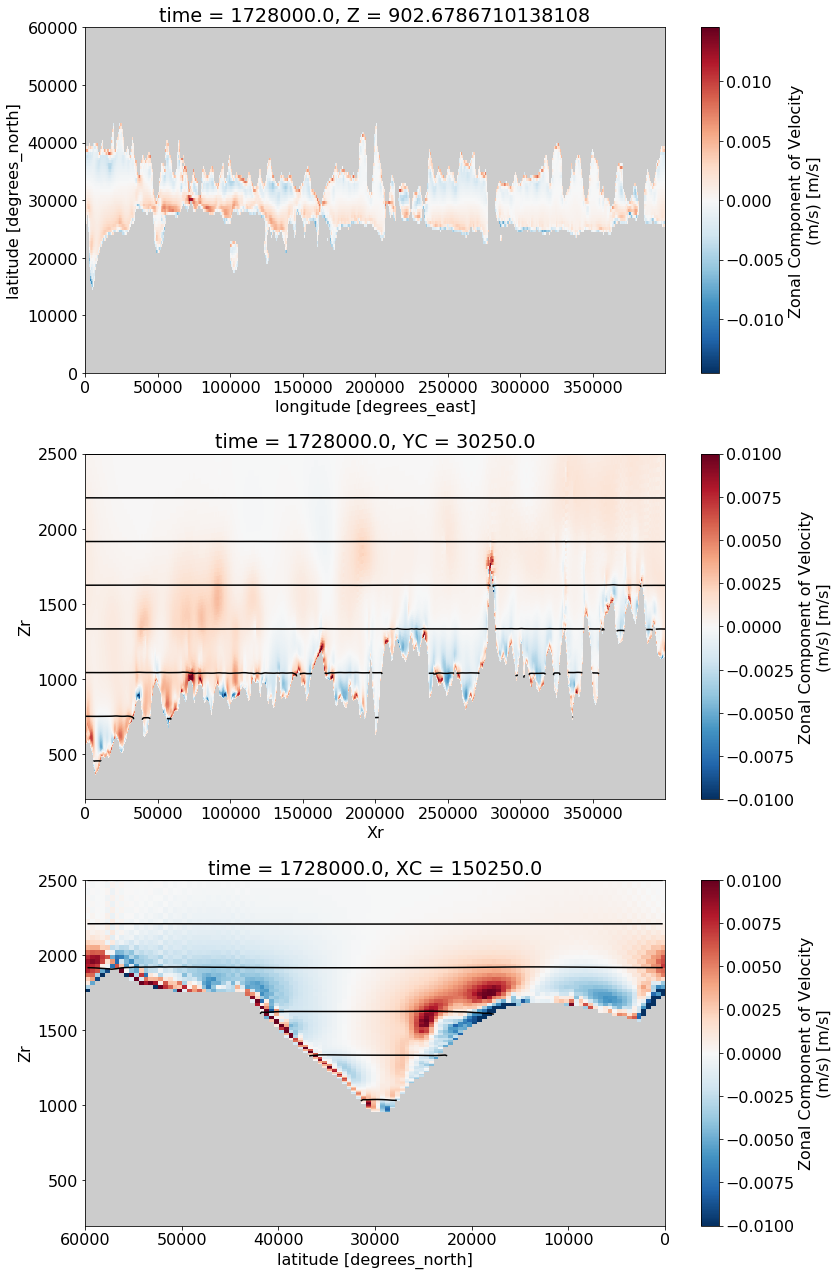

In [33]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1, facecolor=(.8, .8, .8))
ds['UVEL'] = ds['UVEL'].where(ds['UVEL'] != 0.)
ds['UVEL'].isel(time=-1).sel(Z=900, method='nearest').plot(cmap=div_cmap)

plt.subplot(3,1,2, facecolor=(.8, .8, .8))
q = ds['UVEL'].isel(time=-1).sel(YC=3e4, method='nearest').plot(x='Xr_U', y='Zr_U')
q.set_clim([-1e-2, 1e-2])
ds['THETA_BG'].isel(time=-1).sel(YC=3e4, method='nearest').plot.contour(x='Xr', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.25))
plt.ylim([200,2500])

plt.subplot(3,1,3, facecolor=(.8, .8, .8))
q = ds['UVEL'].isel(time=-1).sel(XG=1.5e5, method='nearest').plot(x='YC', y='Zr_U')
q.set_clim([-1e-2, 1e-2])
ds['THETA_BG'].isel(time=-1).sel(XC=1.5e5, method='nearest').plot.contour(x='YC', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.25))
plt.ylim([200,2500])
plt.xlim([6.e4, 0.])

plt.tight_layout()
plt.savefig("../../figures/BBTRE_u.png", bbox_inches='tight', dpi=100.)

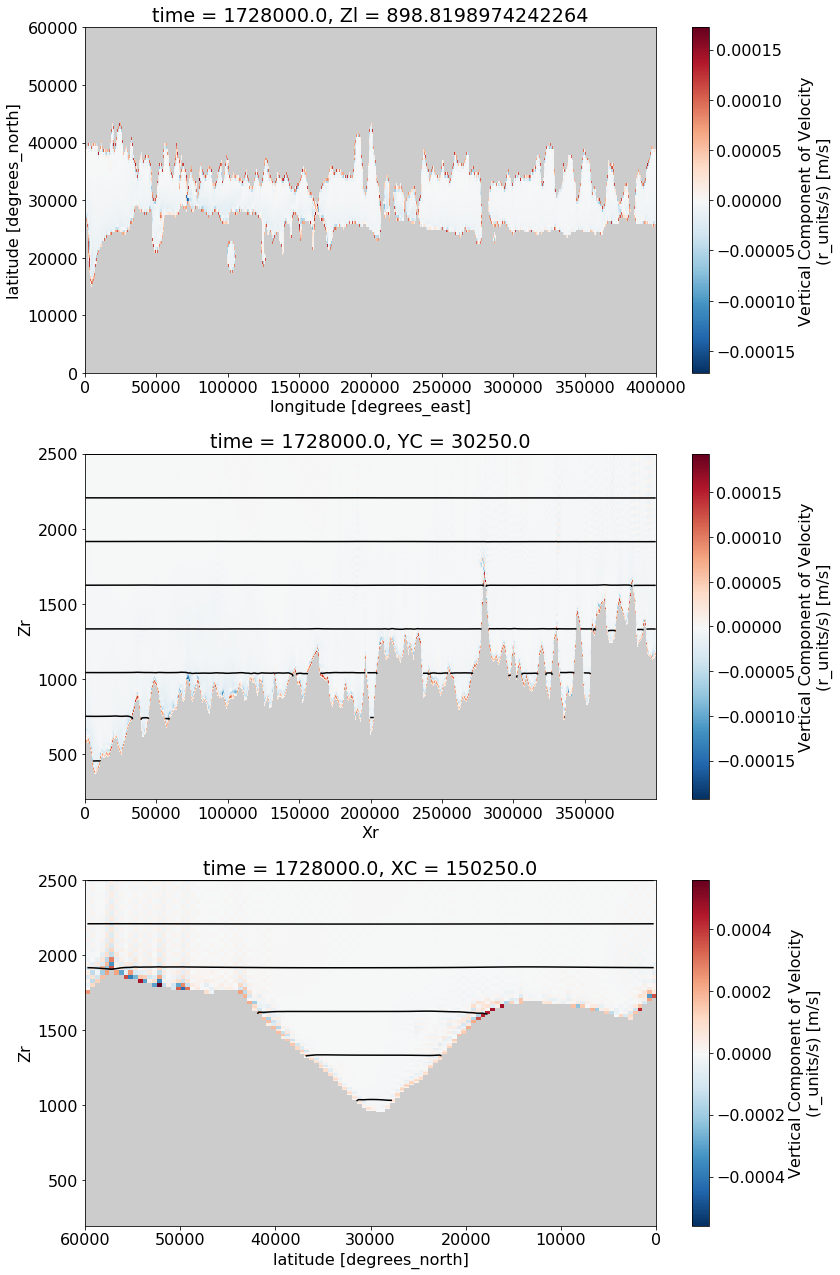

In [37]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1, facecolor=(.8, .8, .8))
ds['WVEL'] = ds['WVEL'].where(ds['WVEL'] != 0.)
ds['WVEL'].isel(time=-1).sel(Zl=900, method='nearest').plot(cmap=div_cmap)

plt.subplot(3,1,2, facecolor=(.8, .8, .8))
q = ds['WVEL'].isel(time=-1).sel(YC=3e4, method='nearest').plot(x='Xr_W', y='Zr_W')
ds['THETA_BG'].isel(time=-1).sel(YC=3e4, method='nearest').plot.contour(x='Xr', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.25))
plt.ylim([200,2500])

plt.subplot(3,1,3, facecolor=(.8, .8, .8))
q = ds['WVEL'].isel(time=-1).sel(XC=1.5e5, method='nearest').plot(x='YC', y='Zr_W')
ds['THETA_BG'].isel(time=-1).sel(XC=1.5e5, method='nearest').plot.contour(x='YC', y='Zr', colors='black', levels=np.arange(0.4, 2.5, 0.25))
plt.ylim([200,2500])
plt.xlim([6.e4, 0.])

plt.tight_layout()
plt.savefig("../../figures/BBTRE_w.png", bbox_inches='tight', dpi=100.)